# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','no-latex']) #ieee, grid

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

from funcs import *
from stats import *
from Fit import *

# Functions

In [2]:
def H_R(w,tau, a):
    return w*tau/np.sqrt(1+np.power(w*tau,2)) + a

def H_C(w,tau, a):
    return 1/np.sqrt(1+np.power(w*tau,2)) + a

def fase_C(w,tau, a):
    return np.arctan(-w*tau) + a

def fase_R(w,tau, a):
    return np.arctan(1/(w*tau)) + a

# RC

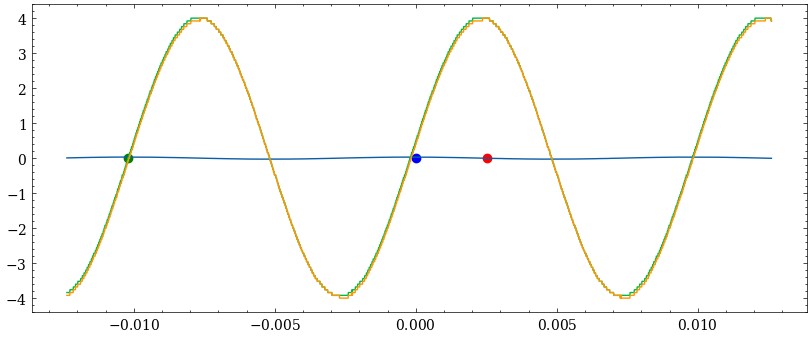

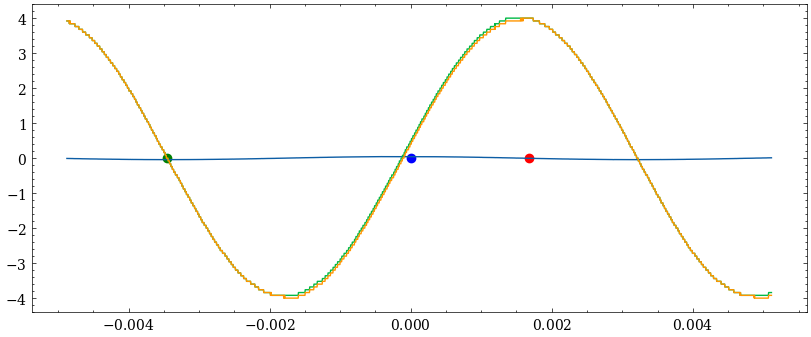

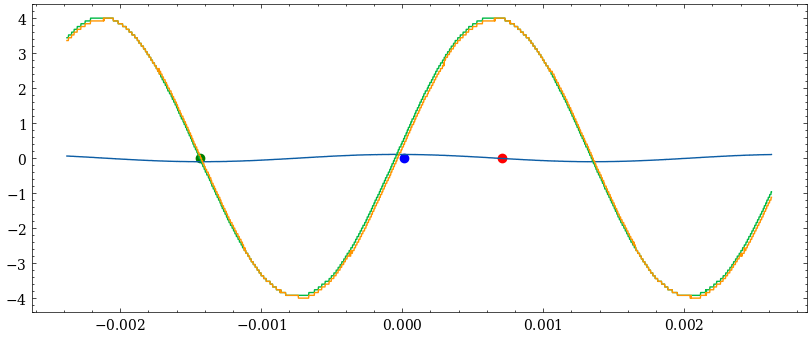

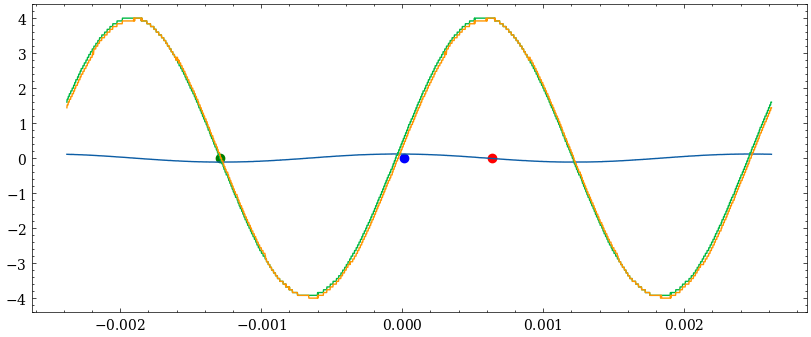

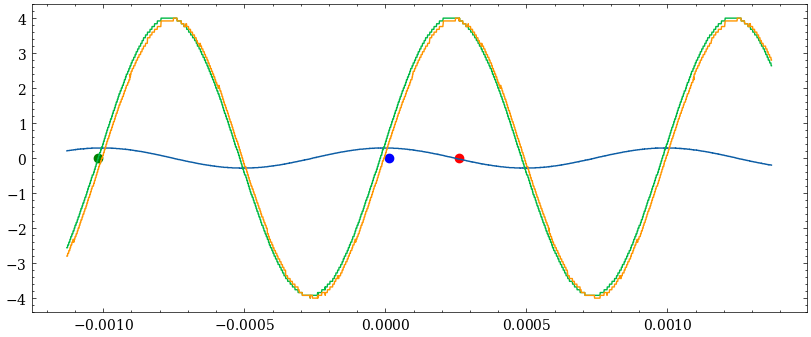

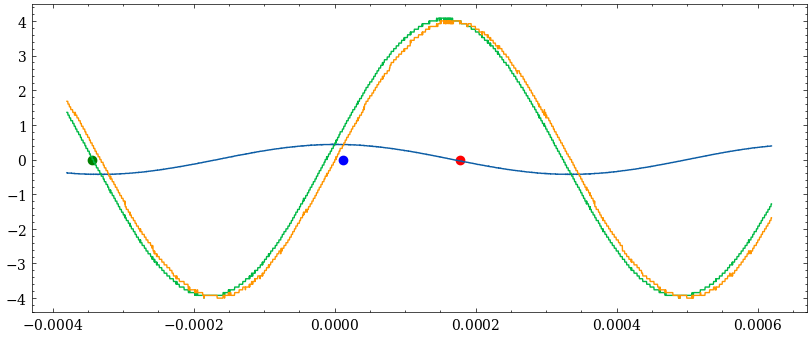

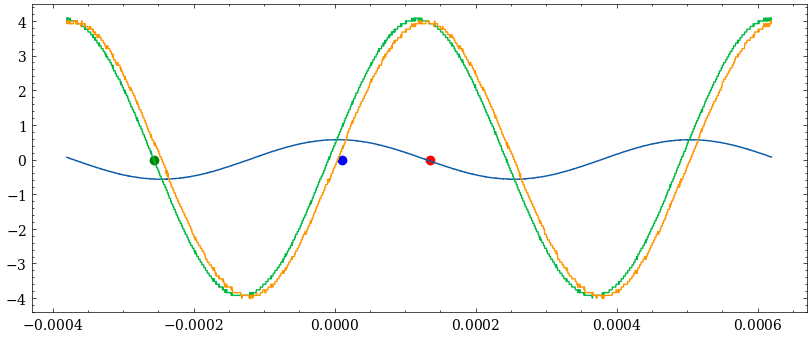

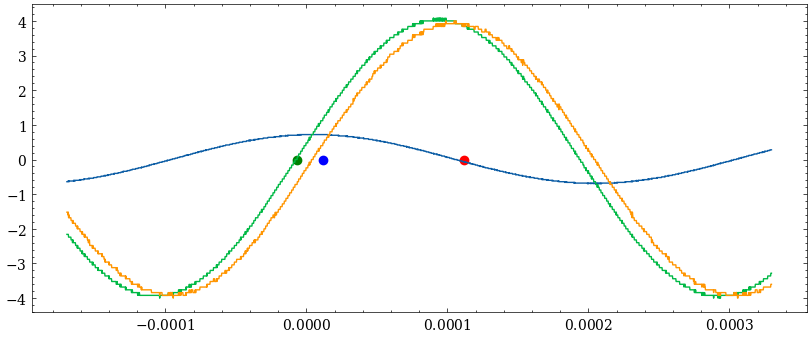

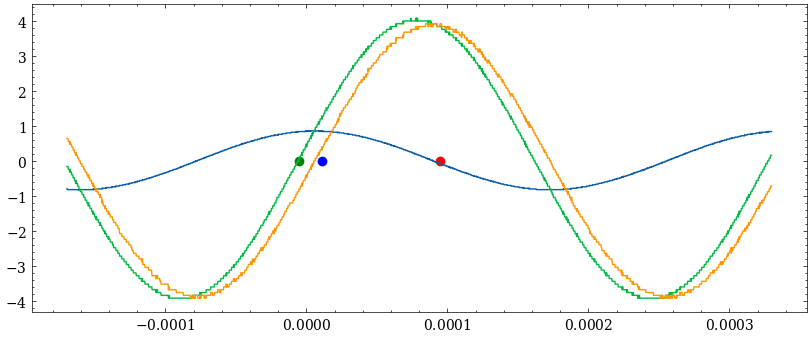

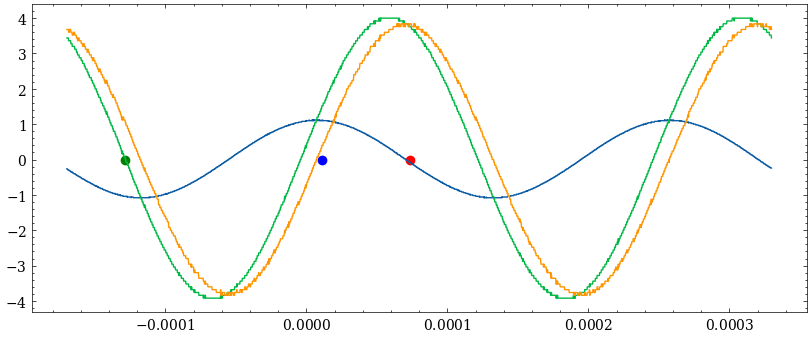

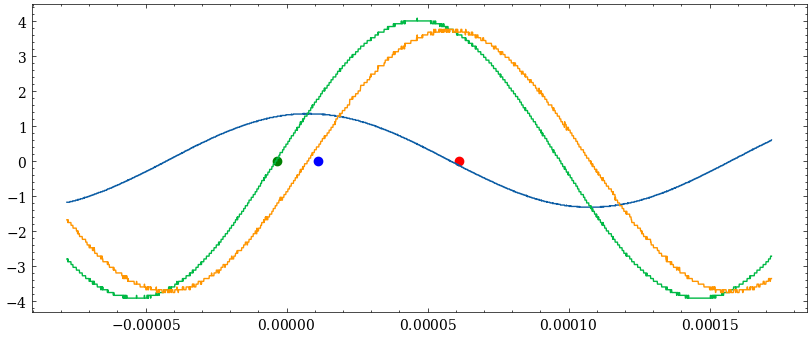

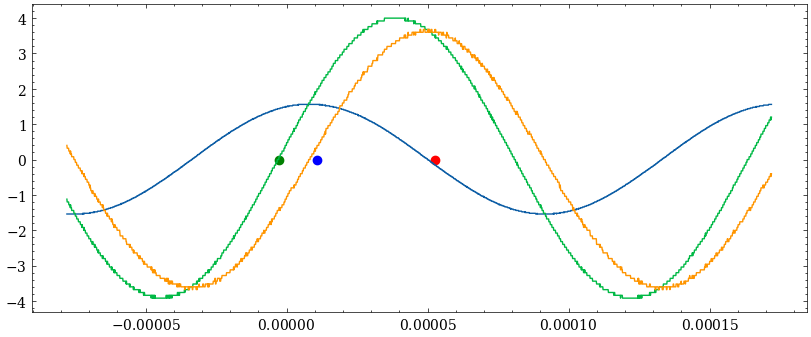

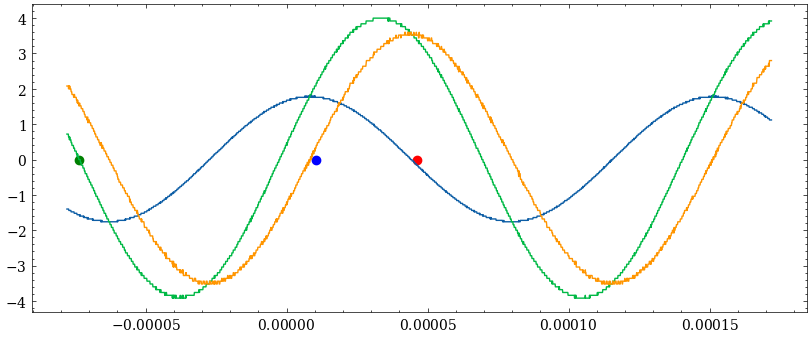

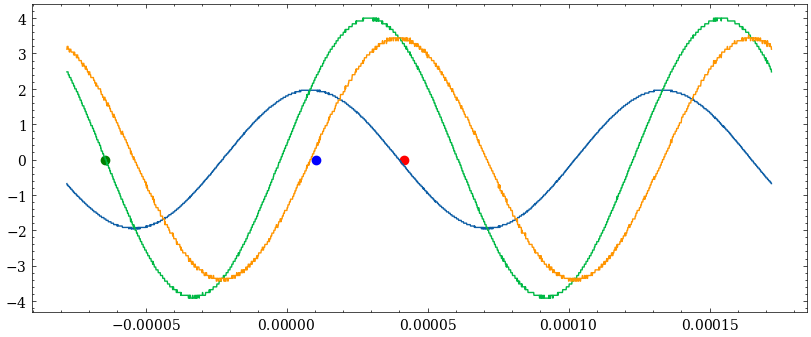

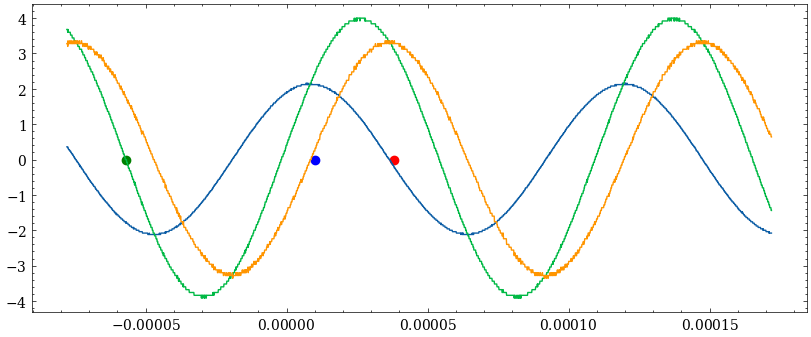

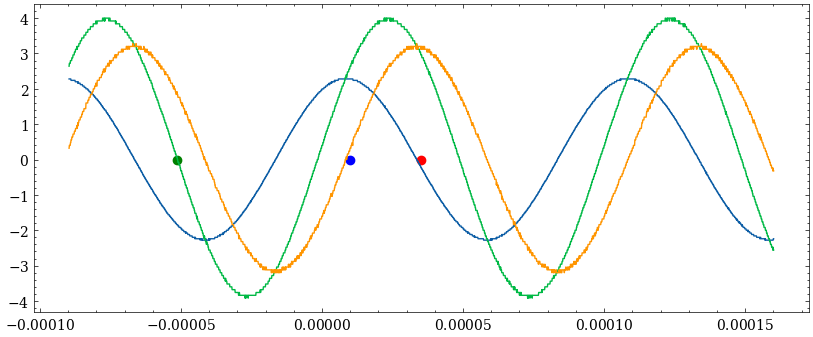

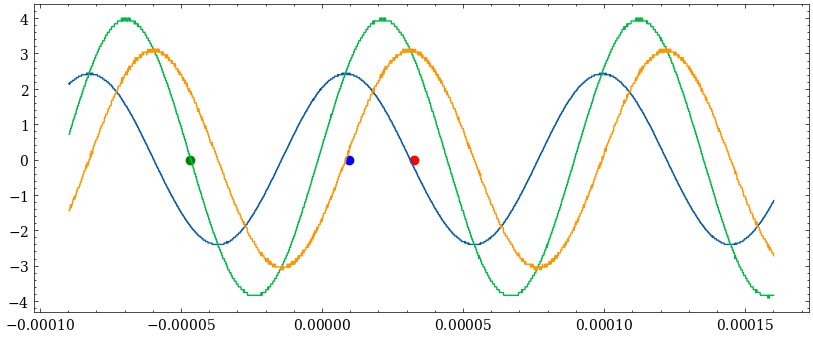

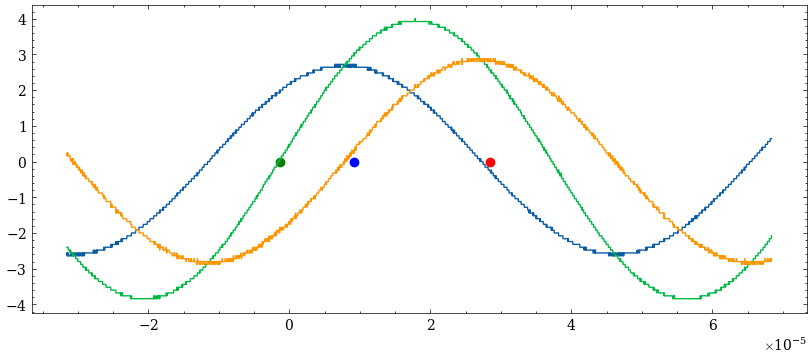

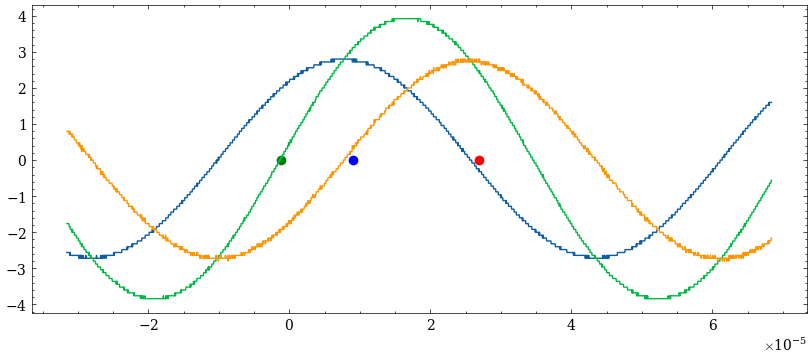

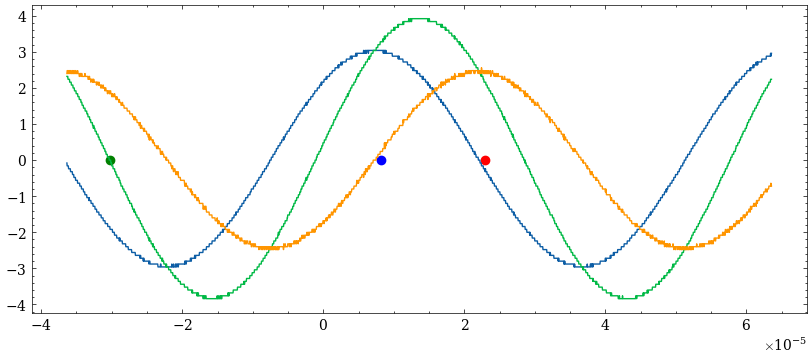

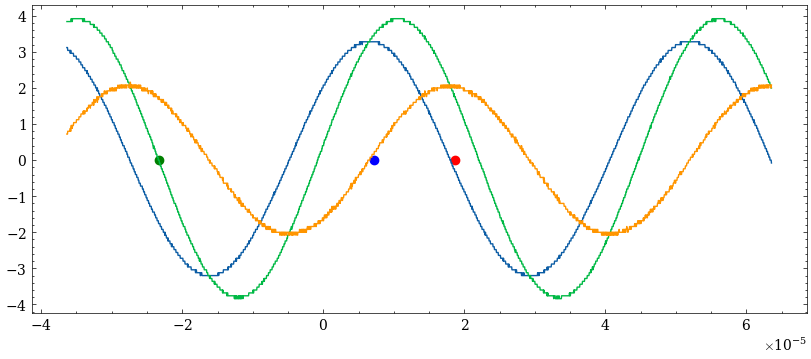

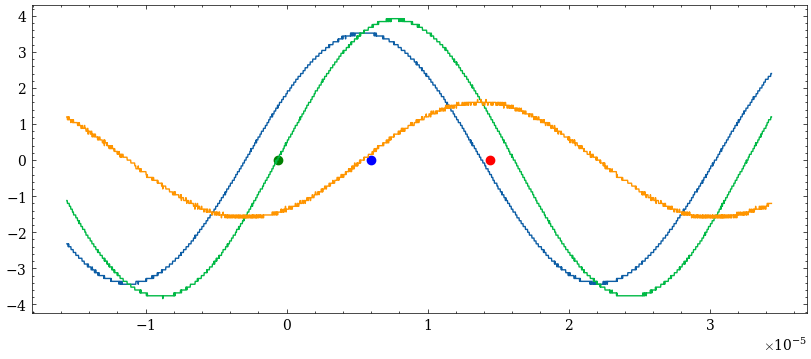

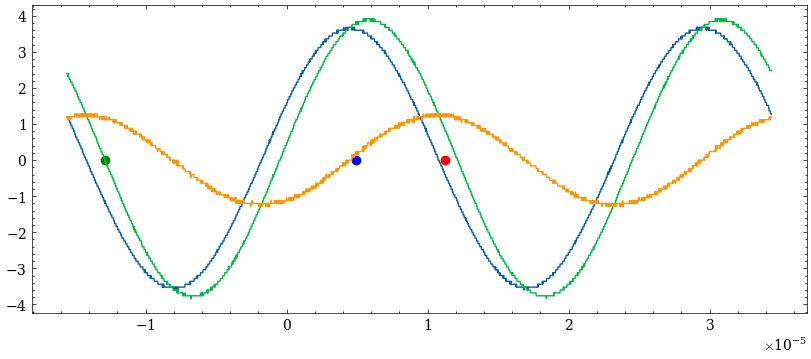

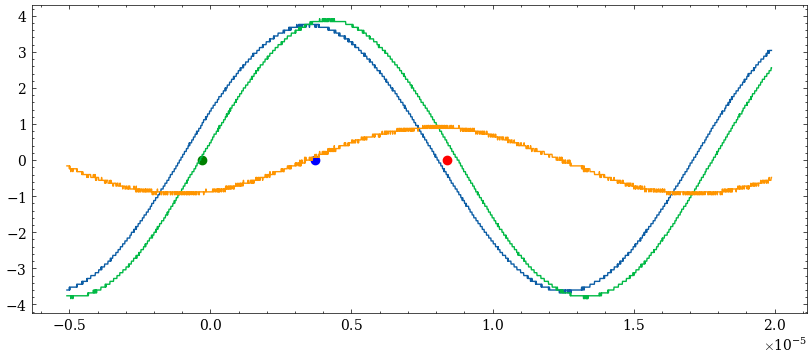

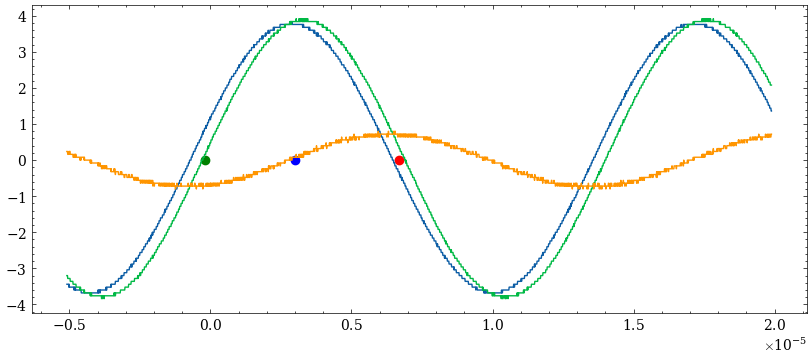

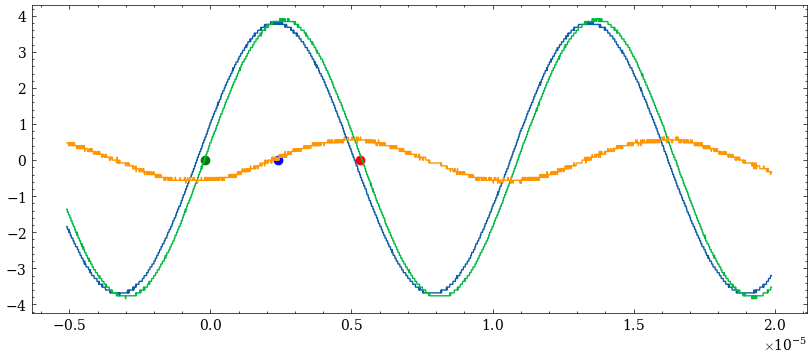

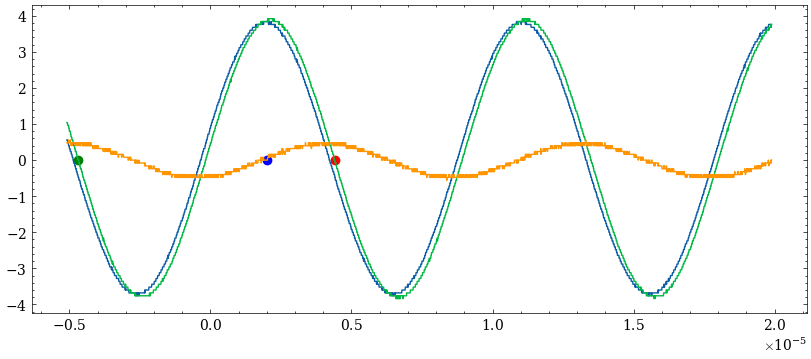

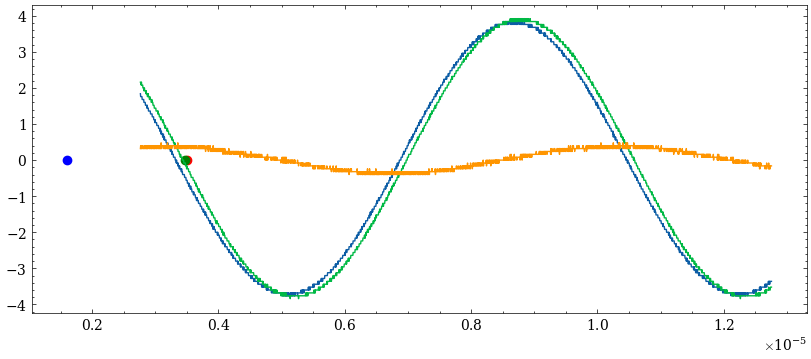

In [5]:
if 1:
    path_folder = 'data.leo/RC/'
    V_res, V_c, fase_res, fase_c = [], [], [], []
    freqs = []
    for i in sorted([int(i) for i in os.listdir(path_folder)]):

        path = path_folder+str(i)+'/'
        # V_SGN, V_MTH, dt_CH1, dt_MTH = analize(path, i, False)
        CH1,SGN,MTH, V_SGN, V_MTH, dt_CH1, dt_MTH, zero_SGN, m = analize(path, i, verbose=True)
        
        plt.figure(figsize=(10,4))
        plt.plot(CH1[0], CH1[1], label='CH1')
        plt.plot(SGN[0], SGN[1], label='SGN')
        plt.plot(MTH[0], MTH[1], label='MTH')

        plt.scatter(dt_CH1, 0, color='red', label='CH1')
        plt.scatter(dt_MTH, 0, color='blue', label='MTH')
        plt.scatter(zero_SGN, 0, color='green', label='SGN')
        plt.show()

        V_res.append(V_SGN)
        V_c.append(V_MTH)
        fase_res.append(dt_CH1*i)
        fase_c.append(dt_MTH*i)
        freqs.append(i)

    V_res = np.array(V_res)
    V_c = np.array(V_c)
    fase_res = np.array(fase_res)
    fase_c = np.array(fase_c)
    freqs = np.array(freqs)*2*np.pi

# Modulo

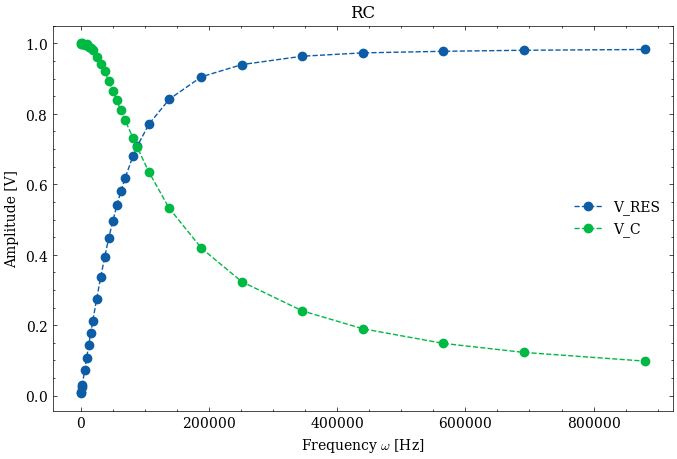

In [131]:
plt.figure(figsize=(8,5))
x = np.linspace(np.min(freqs),np.max(freqs),1000)

# plt.plot(x, H_R(x*2*np.pi, 1e3*12e-9, 0), label='Teorico')
# plt.plot(x, H_C(x*2*np.pi, 1e3*12e-9), label='Teorico')

plt.plot(freqs, V_res, 'o--', label='V_RES')
plt.plot(freqs, V_c, 'o--', label='V_C')
plt.title('RC')
plt.xlabel('Frequency $\omega$ [Hz]')
plt.ylabel('Amplitude [V]')
plt.legend()
plt.show()

## R

959.7697461405829
{'tau': 1.528187541630502e-07, 'a': 0.0031085370618110443}
0.12390737844793472


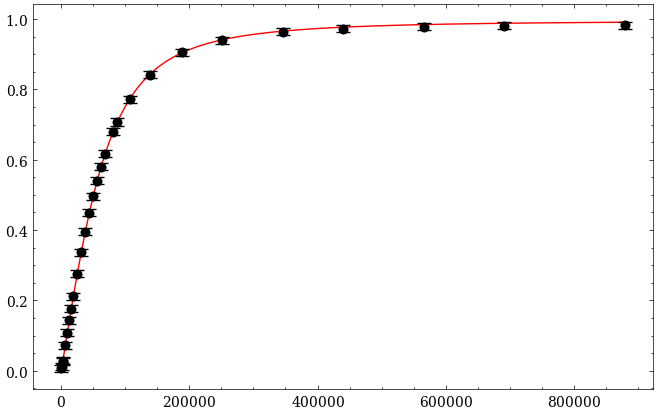

In [125]:
f = Fit(freqs, V_res, H_R, 0.01, kwargs={'tau':1e3*12e-9, 'a':0.})
f.fit()
fig, ax = f.visualize()
fig.set_size_inches(8,5)
print(f.values['tau']/12e-9)
print(f.errors)
print(f.fval/f.ndof)

## C

959.6568143363381
{'tau': 1.6533057340024242e-07, 'a': 0.0030035576691347346}
0.04900977749997005


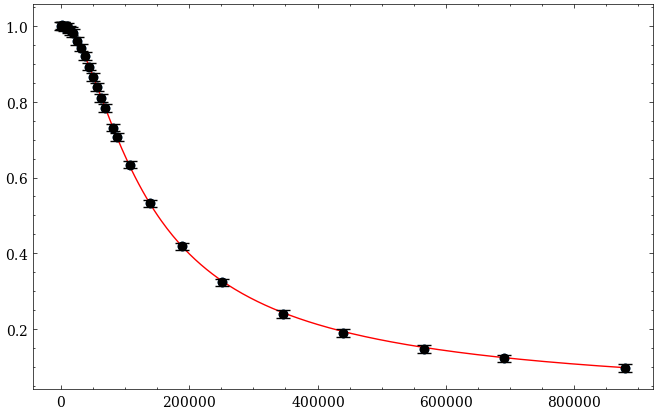

In [126]:
f = Fit(freqs, V_c, H_C, 0.01, kwargs={'tau':1e3*12e-9, 'a':0.})
f.fit()
fig, ax = f.visualize()
fig.set_size_inches(8,5)
print(f.values['tau']/12e-9)
print(f.errors)
print(f.fval/f.ndof)

# Fase

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


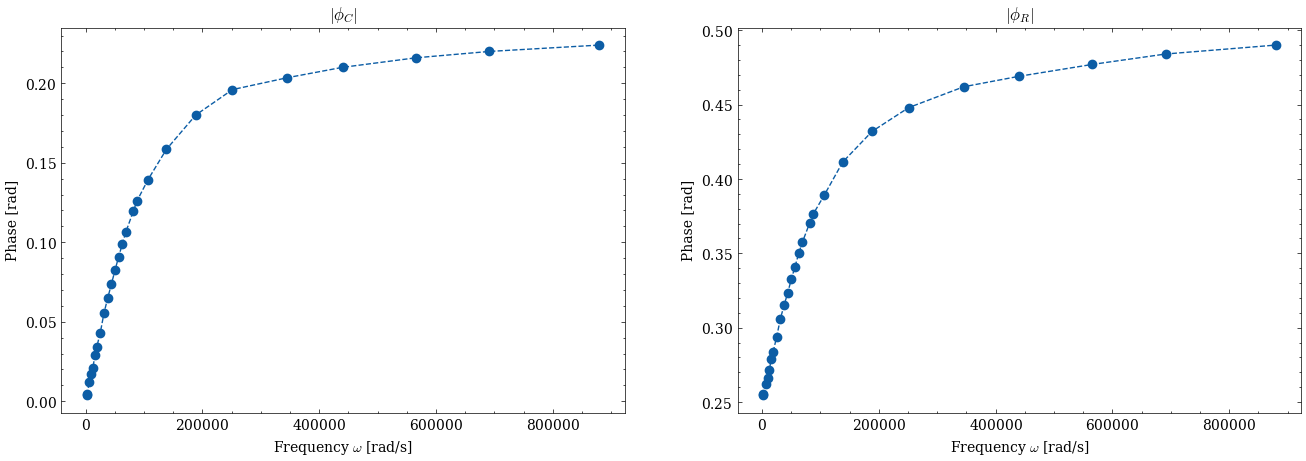

In [4]:
x = np.linspace(np.min(freqs),np.max(freqs),1000)

plt.subplots(1,2,figsize=(16,5))
plt.title('Dati')
plt.subplot(1,2,1)
plt.plot(freqs[2:], fase_c[2:],'o--', lw=1)
plt.title('$|\phi_C|$')
plt.xlabel('Frequency $\omega$ [rad/s]')
plt.ylabel('Phase [rad]')
plt.legend()

plt.subplot(1,2,2)
plt.plot(freqs[2:], fase_res[2:], 'o--', lw=1)
# plt.plot(x, fase_C(x*2*np.pi, 1e3, 12e-9, 0), label='Teorico')
# plt.plot(x, fase_R(x*2*np.pi, 1e3, 12e-9), label='Teorico')
plt.title('$|\phi_R|$')
plt.xlabel('Frequency $\omega$ [rad/s]')
plt.ylabel('Phase [rad]')
plt.show()

## R

{'tau': 817895.3992783255, 'a': 0.3577979228750064}
{'tau': 288535489.14841986, 'a': 1.129384873645297e-06}
R =  68157949939.86046
241987415.53506184


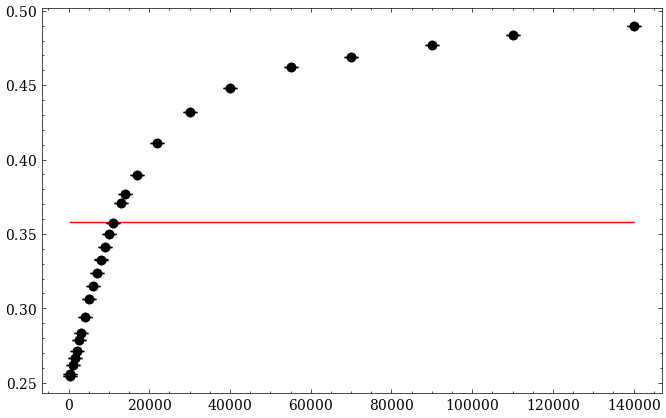

In [128]:
f = Fit(freqs[2:]/(2*np.pi), fase_res[2:], fase_R, 0.000005, kwargs={'tau':12e-3, 'a':0})
f.fit()
fig, ax = f.visualize()
fig.set_size_inches(8,5)
print(f.values)
print(f.errors)
print('R = ', f.values['tau']/12e-6)
print(f.fval/f.ndof)

## C

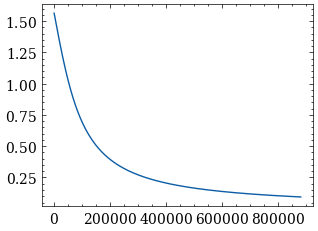

In [129]:
x = np.linspace(np.min(freqs),np.max(freqs),1000)
y = fase_R(x, 1e3*12e-9, 0)
plt.plot(x, y, label='Teorico')

{'tau': -2.739647078777837e-07, 'a': 0.06088025308443654}
{'tau': 4.462210344702158e-12, 'a': 1.2093140460521225e-06}
69352696.9423972


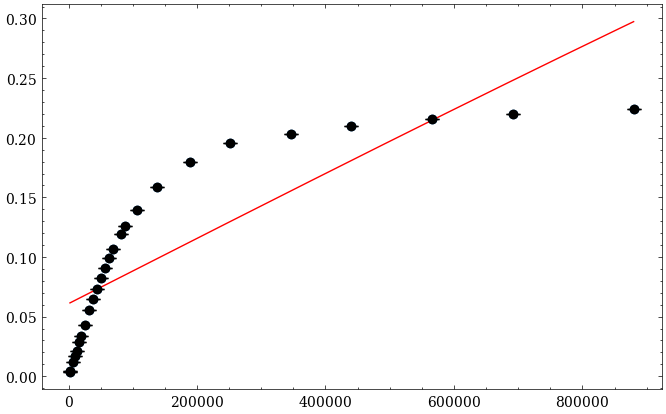

In [130]:
f = Fit(freqs[2:], fase_c[2:], fase_C, 0.000005, kwargs={'tau':12e-9, 'a':1.57})
f.fit()
fig, ax = f.visualize()
fig.set_size_inches(8,5)
print(f.values)
print(f.errors)
print(f.fval/f.ndof)